# Predicciones de Tarifa de Vuelo

### Cargando librerias

In [1]:
# Manipulacion y tratamiento de datos
import numpy as numpy
import pandas as pd


# Visualizacion de los datos
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns

# no presentar algun de mensaje
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df =  pd.read_excel("./a1_FlightFare_Dataset.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10001 non-null  object
 1   Date_of_Journey  10001 non-null  object
 2   Source           10001 non-null  object
 3   Destination      10001 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10001 non-null  object
 6   Arrival_Time     10001 non-null  object
 7   Duration         10001 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10001 non-null  object
 10  Price            10001 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.6+ KB


In [5]:
# Revisando si tenemos valore nulos

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10000 non-null  object
 1   Date_of_Journey  10000 non-null  object
 2   Source           10000 non-null  object
 3   Destination      10000 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10000 non-null  object
 6   Arrival_Time     10000 non-null  object
 7   Duration         10000 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10000 non-null  object
 10  Price            10000 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 937.5+ KB


In [8]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10000 non-null  object        
 1   Date_of_Journey  10000 non-null  datetime64[ns]
 2   Source           10000 non-null  object        
 3   Destination      10000 non-null  object        
 4   Route            10000 non-null  object        
 5   Dep_Time         10000 non-null  datetime64[ns]
 6   Arrival_Time     10000 non-null  datetime64[ns]
 7   Duration         10000 non-null  object        
 8   Total_Stops      10000 non-null  object        
 9   Additional_Info  10000 non-null  object        
 10  Price            10000 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 937.5+ KB


In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-07-22 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-22 05:50:00,2024-07-22 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-22 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-07-22 18:05:00,2024-07-22 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-07-22 16:50:00,2024-07-22 21:35:00,4h 45m,1 stop,No info,13302


In [11]:
# extraer informaciones estacionales hora y minutos

def extract_hour(data,col):
    data[col+'_Hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_Min']=data[col].dt.minute

In [12]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')

In [13]:
df['Dep_Time'] = df['Dep_Time'].dt.strftime('%H:%M')
df['Arrival_Time'] = df['Arrival_Time'].dt.strftime('%H:%M')


In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50,21,35


In [15]:
# Crear los horarios

def categorize_time(time_str):
    time = pd.to_datetime(time_str, format='%H:%M').time()
    
    if time >= pd.to_datetime('08:00', format='%H:%M').time() and time < pd.to_datetime('12:00', format='%H:%M').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00', format='%H:%M').time() and time < pd.to_datetime('16:00', format='%H:%M').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('16:00', format='%H:%M').time() and time < pd.to_datetime('20:00', format='%H:%M').time():
        return 'Evening'
    elif time >= pd.to_datetime('20:00', format='%H:%M').time() and time <= pd.to_datetime('23:59', format='%H:%M').time():
        return 'Night'
    elif time >= pd.to_datetime('00:00', format='%H:%M').time() and time < pd.to_datetime('04:00', format='%H:%M').time():
        return 'Late_Night'
    else:
        return 'Early_Morning'

    


In [16]:
df["Dep_Time_Category"] = df["Dep_Time"].apply(categorize_time)

df["Arrival_Time_Category"] = df["Arrival_Time"].apply(categorize_time)

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Category,Arrival_Time_Category
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,22,20,1,10,Night,Late_Night
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50,13,15,Early_Morning,Afternoon
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,25,4,25,Morning,Early_Morning
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5,23,30,Evening,Night
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50,21,35,Evening,Night


# Análisis Exploratorio de Datos

In [18]:
def count_plot(data, x_column):
    counts = data[x_column].value_counts().sort_values(ascending=False)
    custom_palette = sns.color_palette('Set1', len(counts))
    plt.figure(figsize=(13, 7))
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel=x_column, fontsize=14, fontweight='bold', color='#333333')
    
    ax = sns.countplot(data=data, x=x_column, order=counts.index, palette=custom_palette)

    total = len(data[x_column])
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total) * 100
        ax.annotate(f'{count}\n({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black')

    sns.despine()
    plt.tight_layout()
    plt.show()

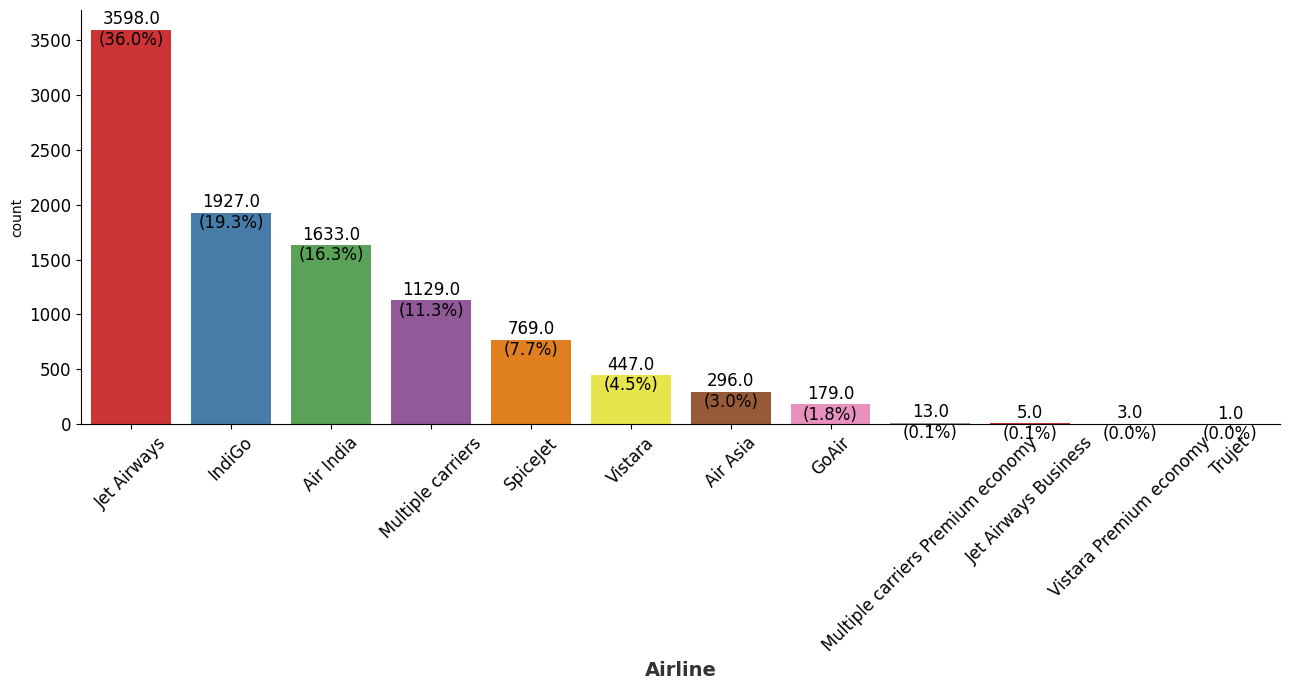

In [19]:
count_plot(df, x_column = "Airline")

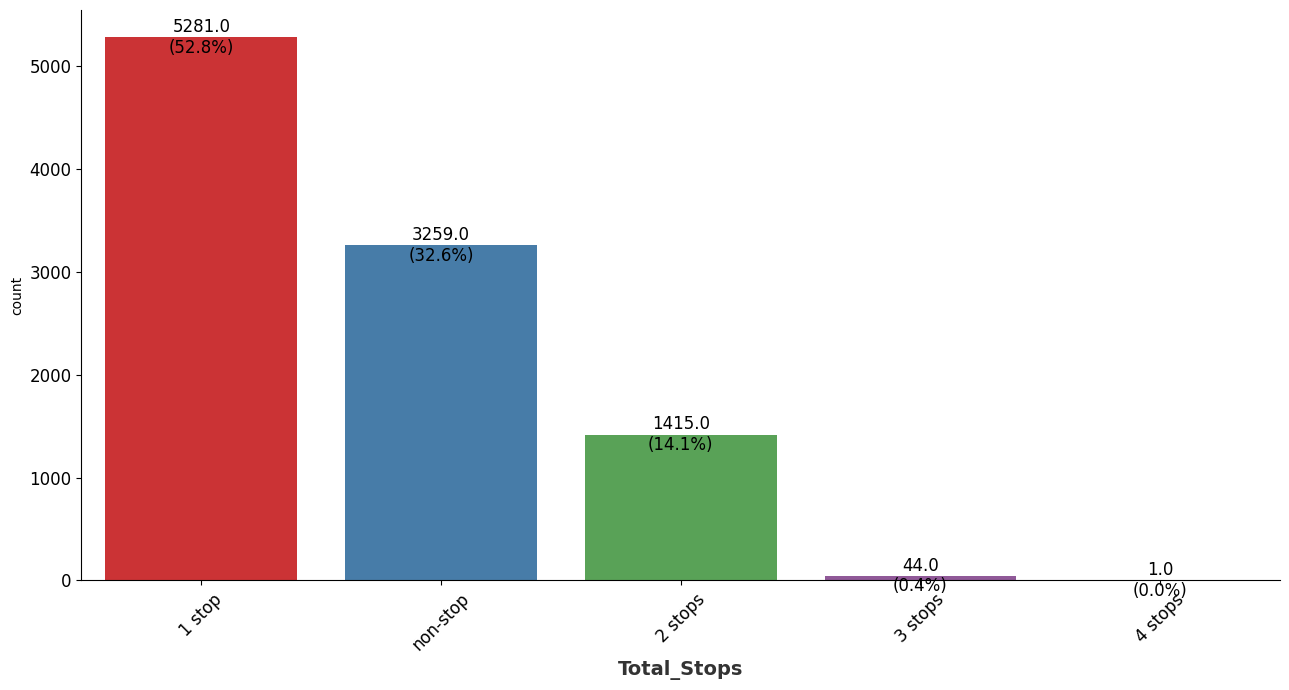

In [20]:
count_plot(df, x_column = "Total_Stops")

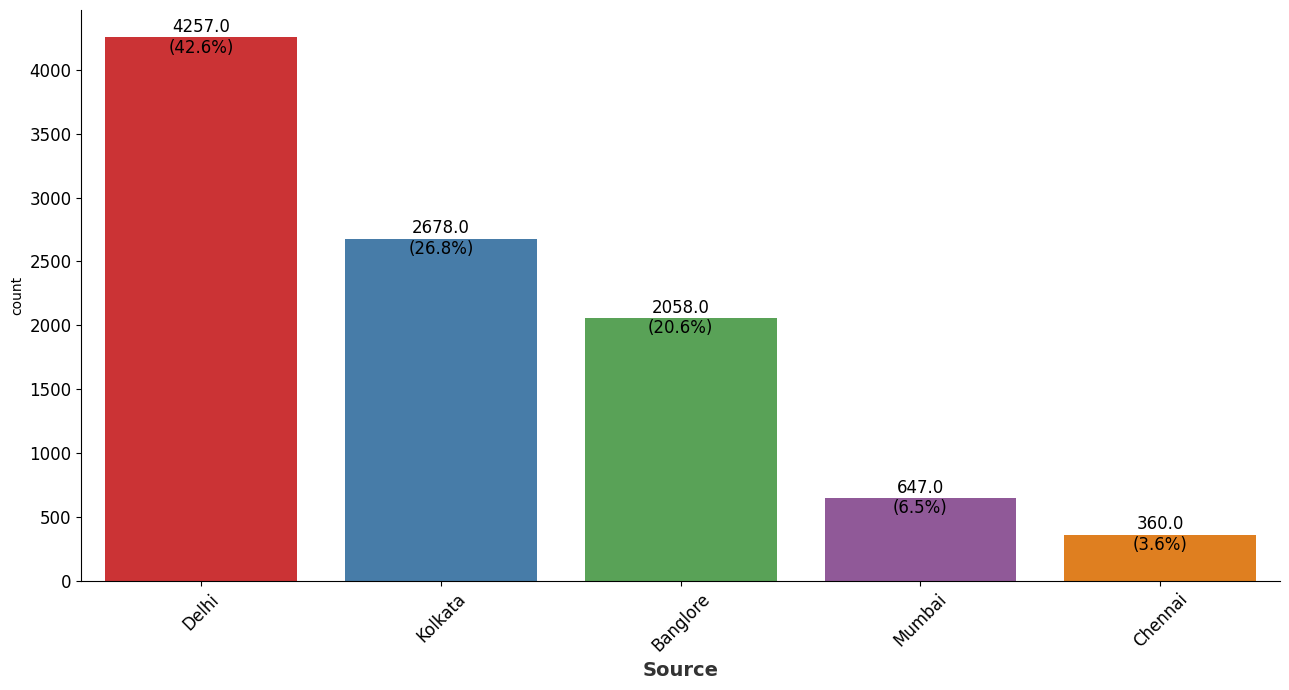

In [21]:
count_plot(df, "Source")

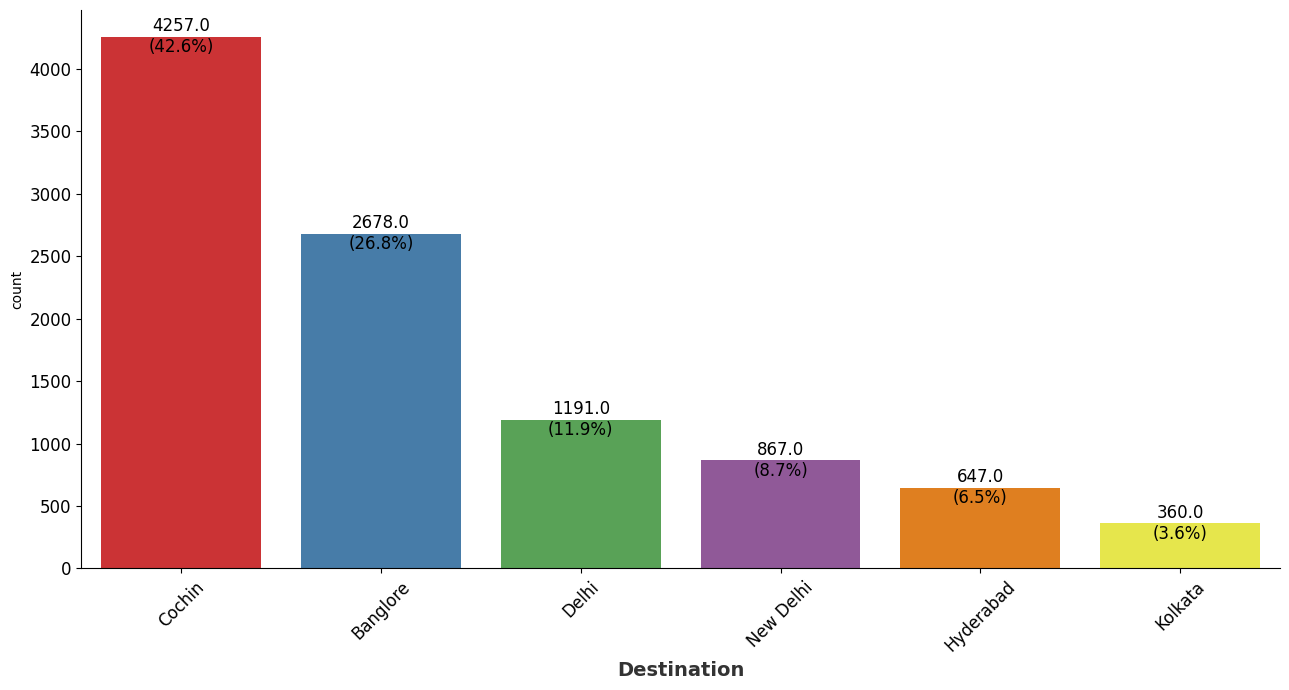

In [22]:
count_plot(df, x_column =  "Destination")

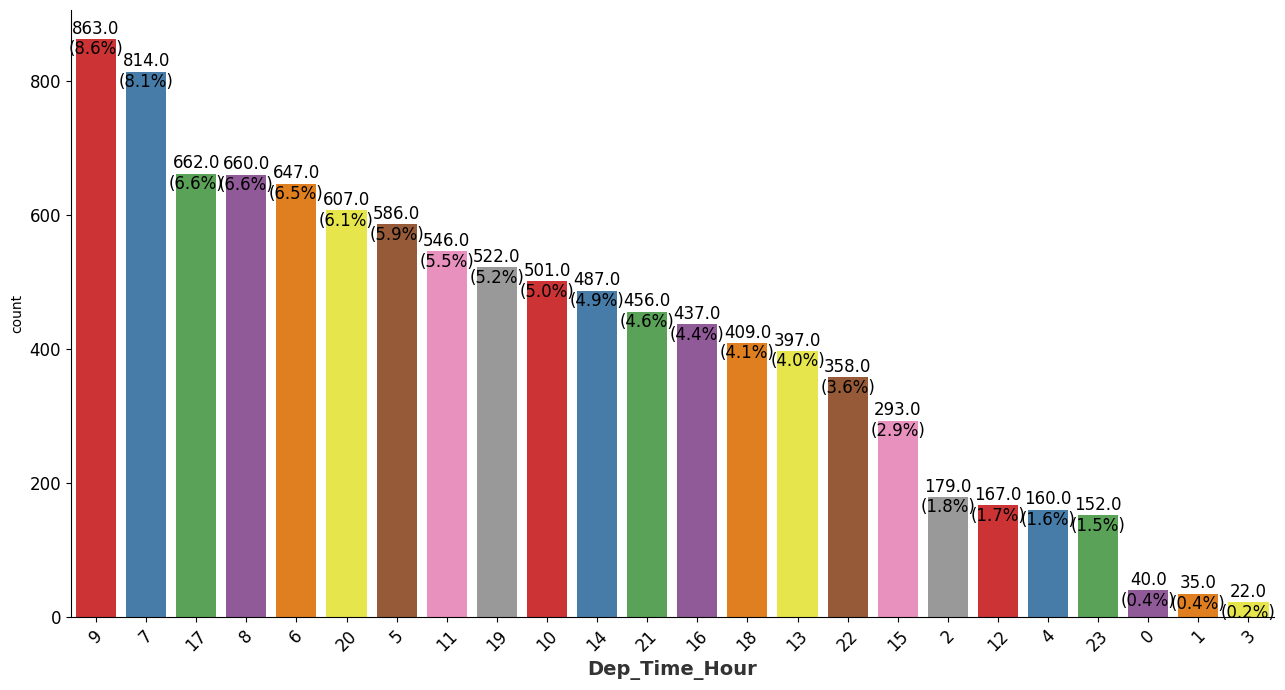

In [23]:
count_plot(df, x_column = "Dep_Time_Hour")

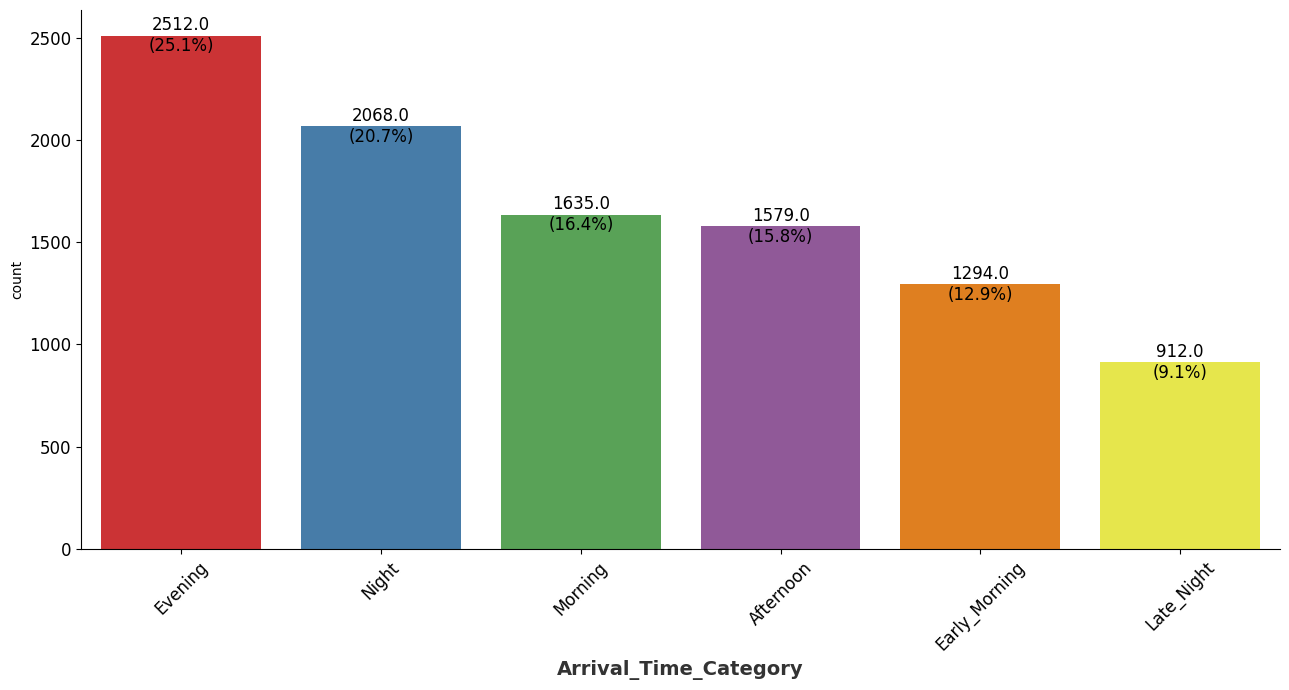

In [24]:
count_plot(df, x_column =  "Arrival_Time_Category")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                10000 non-null  object        
 1   Date_of_Journey        10000 non-null  datetime64[ns]
 2   Source                 10000 non-null  object        
 3   Destination            10000 non-null  object        
 4   Route                  10000 non-null  object        
 5   Dep_Time               10000 non-null  object        
 6   Arrival_Time           10000 non-null  object        
 7   Duration               10000 non-null  object        
 8   Total_Stops            10000 non-null  object        
 9   Additional_Info        10000 non-null  object        
 10  Price                  10000 non-null  int64         
 11  Dep_Time_Hour          10000 non-null  int32         
 12  Dep_Time_Min           10000 non-null  int32         
 13  Arriva

In [26]:
df["day"] =  pd.DatetimeIndex(df["Date_of_Journey"]).day 
df["mont"] =  pd.DatetimeIndex(df["Date_of_Journey"]).month
df["year"] =  pd.DatetimeIndex(df["Date_of_Journey"]).year
df["weekday"] =  pd.DatetimeIndex(df["Date_of_Journey"]).weekday


In [27]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Category,Arrival_Time_Category,day,mont,year,weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,22,20,1,10,Night,Late_Night,24,3,2019,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50,13,15,Early_Morning,Afternoon,1,5,2019,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,25,4,25,Morning,Early_Morning,9,6,2019,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5,23,30,Evening,Night,12,5,2019,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50,21,35,Evening,Night,1,3,2019,4


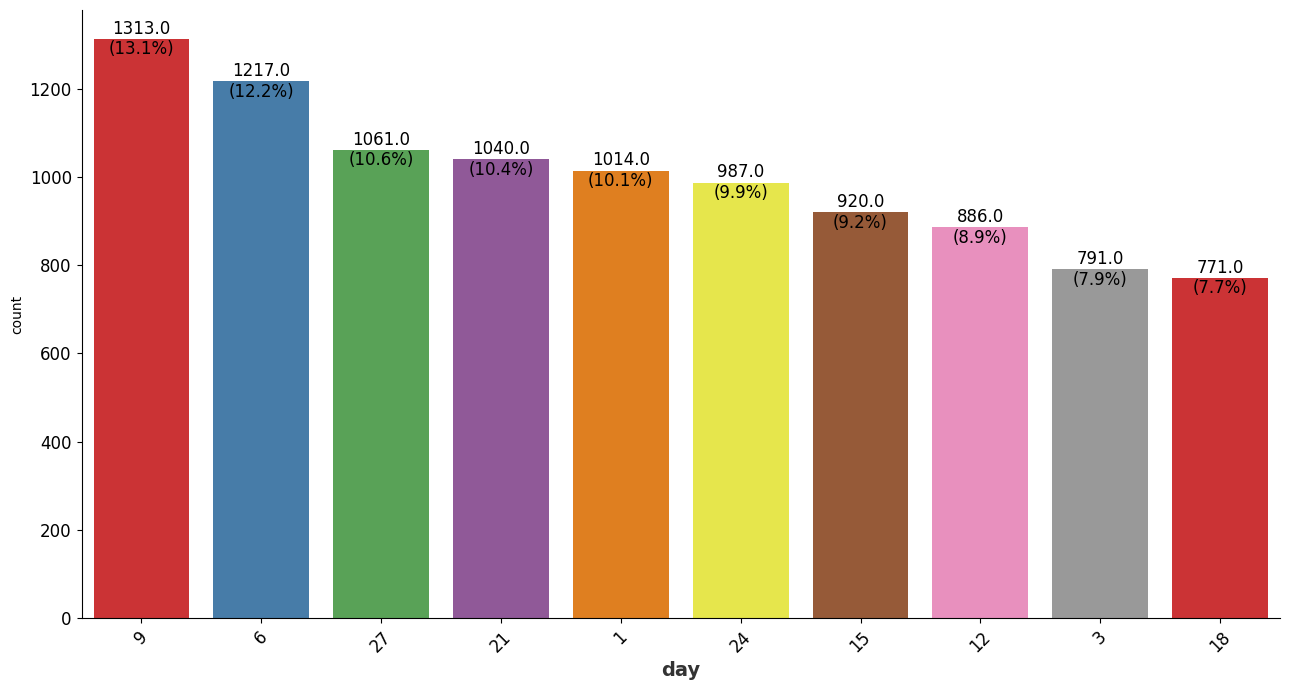

In [28]:
count_plot(df, "day")

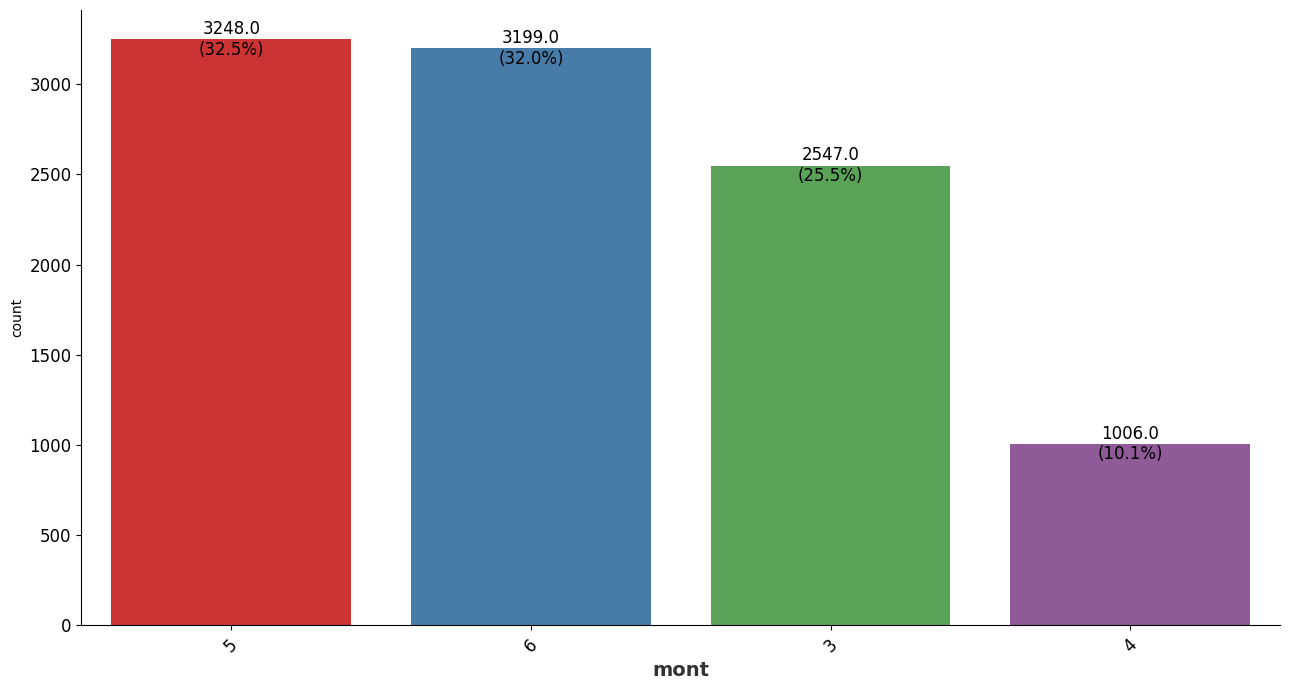

In [29]:
count_plot(df, x_column =  "mont")

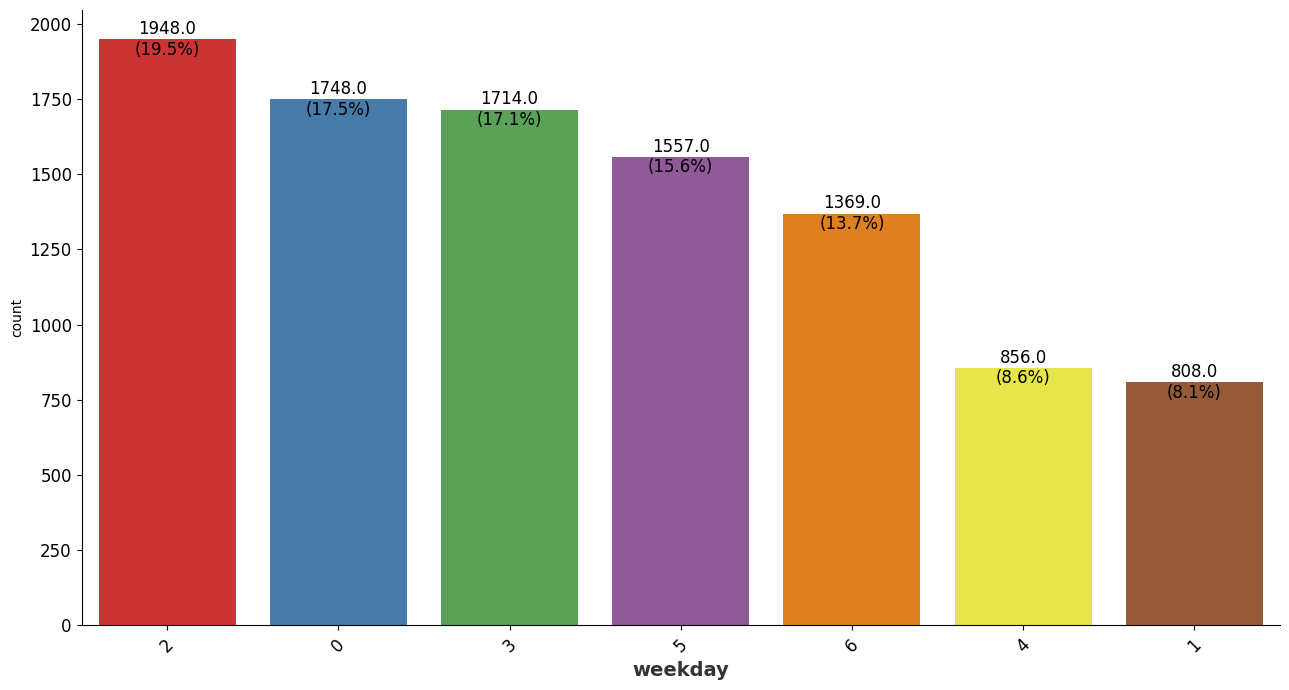

In [30]:
count_plot(df, x_column = "weekday")

In [31]:
# Graficar displot y boxplot

def dist_box_plot(df, col):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col], kde=True)
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

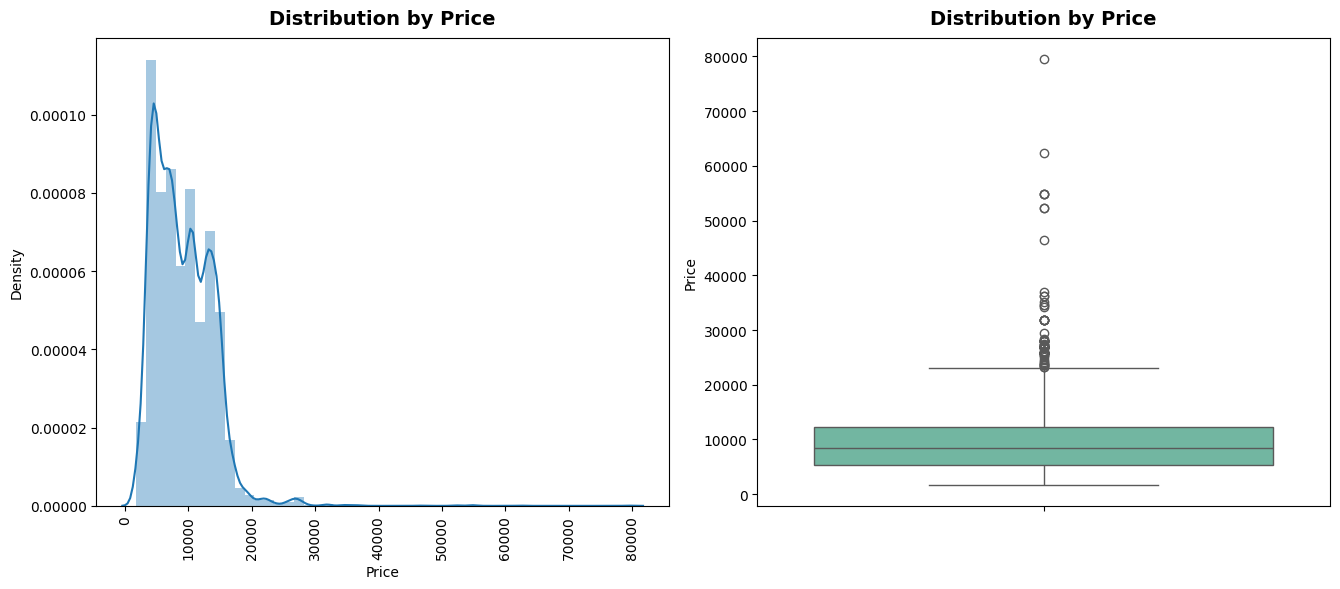

In [32]:
dist_box_plot(df, "Price")

In [33]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Category,Arrival_Time_Category,day,mont,year,weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,22,20,1,10,Night,Late_Night,24,3,2019,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50,13,15,Early_Morning,Afternoon,1,5,2019,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,25,4,25,Morning,Early_Morning,9,6,2019,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5,23,30,Evening,Night,12,5,2019,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50,21,35,Evening,Night,1,3,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Multiple carriers,2019-06-27,Delhi,Cochin,DEL → IDR → BOM → COK,15:05,01:30,10h 25m,2 stops,No info,15965,15,5,1,30,Afternoon,Late_Night,27,6,2019,3
9997,Jet Airways,2019-05-06,Kolkata,Banglore,CCU → BOM → BLR,06:30,18:15,11h 45m,1 stop,In-flight meal not included,10844,6,30,18,15,Early_Morning,Evening,6,5,2019,0
9998,Air India,2019-05-12,Banglore,Delhi,BLR → DEL,13:20,16:10,2h 50m,non-stop,No info,6121,13,20,16,10,Afternoon,Evening,12,5,2019,6
9999,IndiGo,2019-04-24,Banglore,Delhi,BLR → DEL,22:10,01:00,2h 50m,non-stop,No info,3625,22,10,1,0,Night,Late_Night,24,4,2019,2


In [34]:
df["Duration"] =  df["Duration"].str.replace("h", "*1").str.replace(" ", "+").str.replace("m", "/60").apply(eval)

df["Duration"] = df["Duration"].apply(lambda x: round(x, 2))

In [35]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Category,Arrival_Time_Category,day,mont,year,weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2.83,non-stop,No info,3897,22,20,1,10,Night,Late_Night,24,3,2019,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.42,2 stops,No info,7662,5,50,13,15,Early_Morning,Afternoon,1,5,2019,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19.00,2 stops,No info,13882,9,25,4,25,Morning,Early_Morning,9,6,2019,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1 stop,No info,6218,18,5,23,30,Evening,Night,12,5,2019,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1 stop,No info,13302,16,50,21,35,Evening,Night,1,3,2019,4


In [36]:
df_temp = df.groupby(["Duration"])["Price"].mean().reset_index()

df_temp

,Duration,Price
0,0.08,17327.000000
1,1.25,3997.227273
2,1.33,3347.648148
3,1.42,5041.926230
4,1.50,3739.181818
...,...,...
359,39.08,17135.000000
360,41.33,13990.000000
361,42.08,11664.000000
362,42.75,12819.000000


Text(0.5, 1.0, 'Precio Promedio de Boletos vs Duracion')

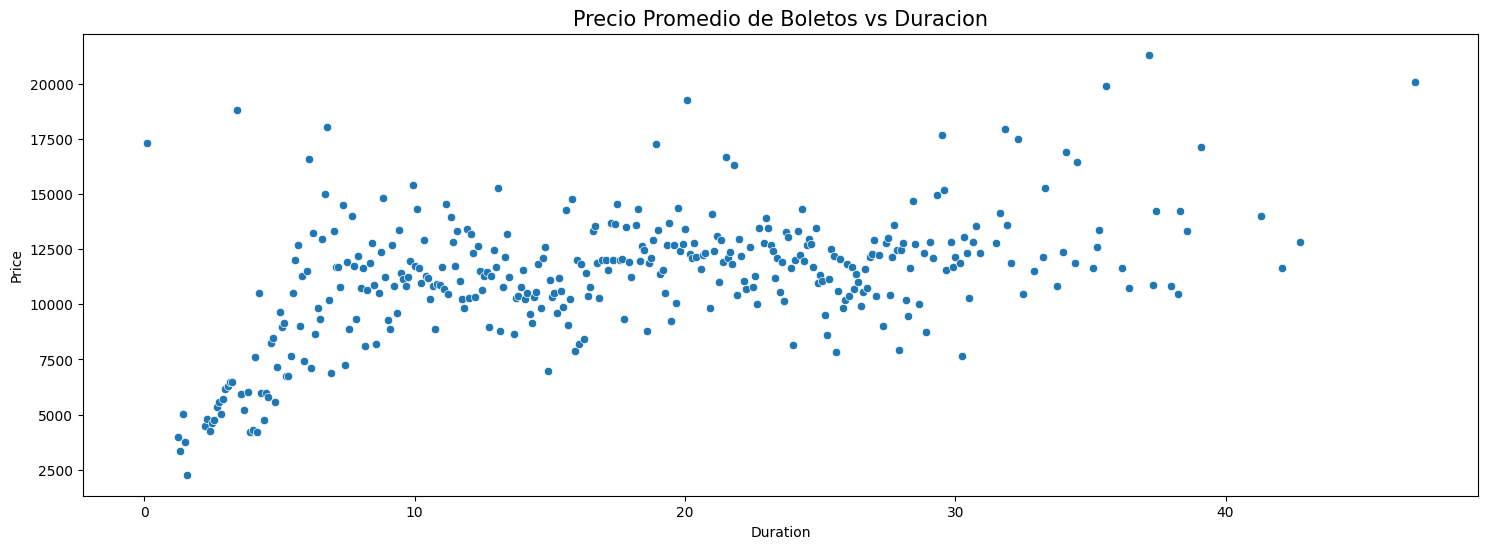

In [37]:
plt.figure(figsize = (18, 6))

sns.scatterplot(x = "Duration", y = "Price", data = df_temp).set_title("Precio Promedio de Boletos vs Duracion", fontsize = 15)

Text(0.5, 1.0, 'Precio vs Arrival Time')

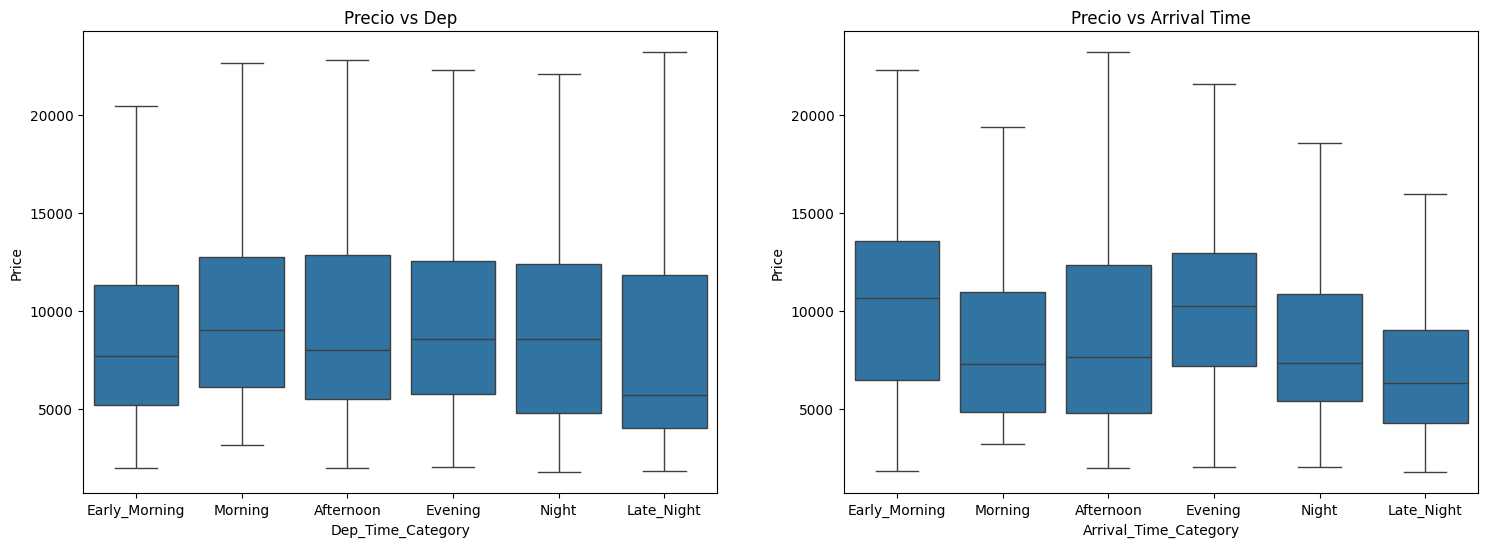

In [38]:
flight_order = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]

plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data = df, y = "Price", x = "Dep_Time_Category", showfliers = False, order = flight_order).set_title("Precio vs Dep")

plt.subplot(1, 2, 2)
sns.boxplot(data = df, y =  "Price", x = "Arrival_Time_Category",  showfliers = False, order = flight_order).set_title("Precio vs Arrival Time")

Text(0.5, 1.0, 'Precio vs Destination')

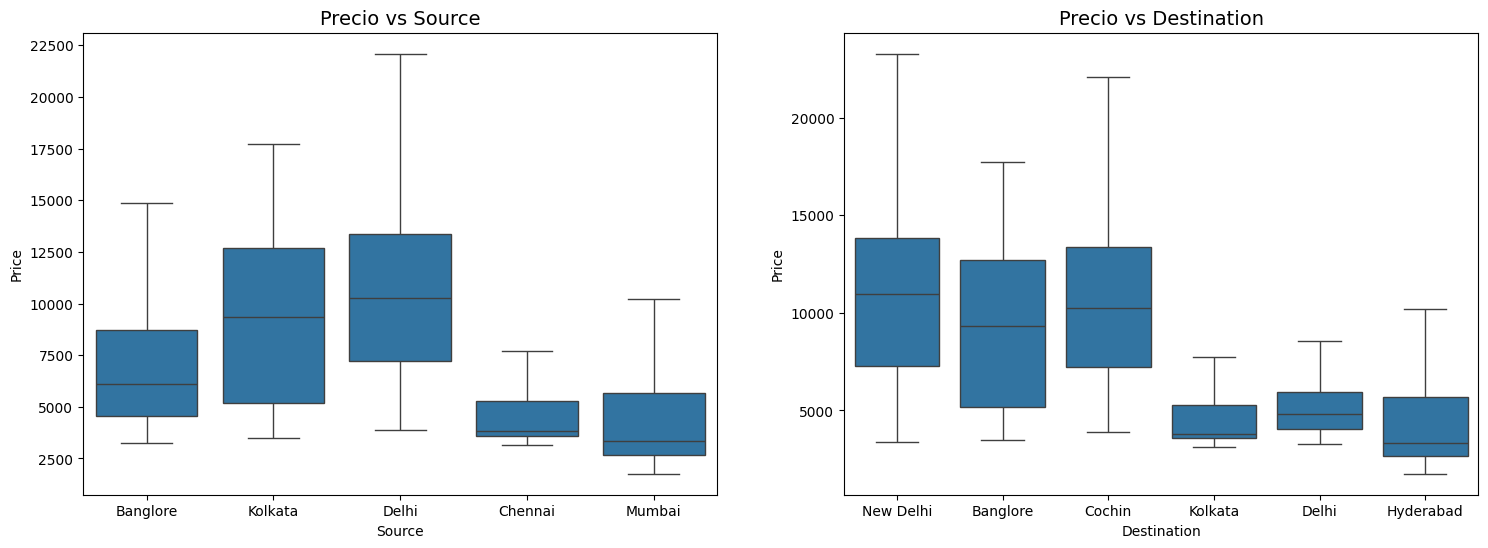

In [39]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data = df, y = "Price", x = "Source", showfliers = False, ).set_title("Precio vs Source", fontsize = 14)

plt.subplot(1, 2, 2)
sns.boxplot(data = df, y =  "Price", x = "Destination",  showfliers = False, ).set_title("Precio vs Destination", fontsize = 14)

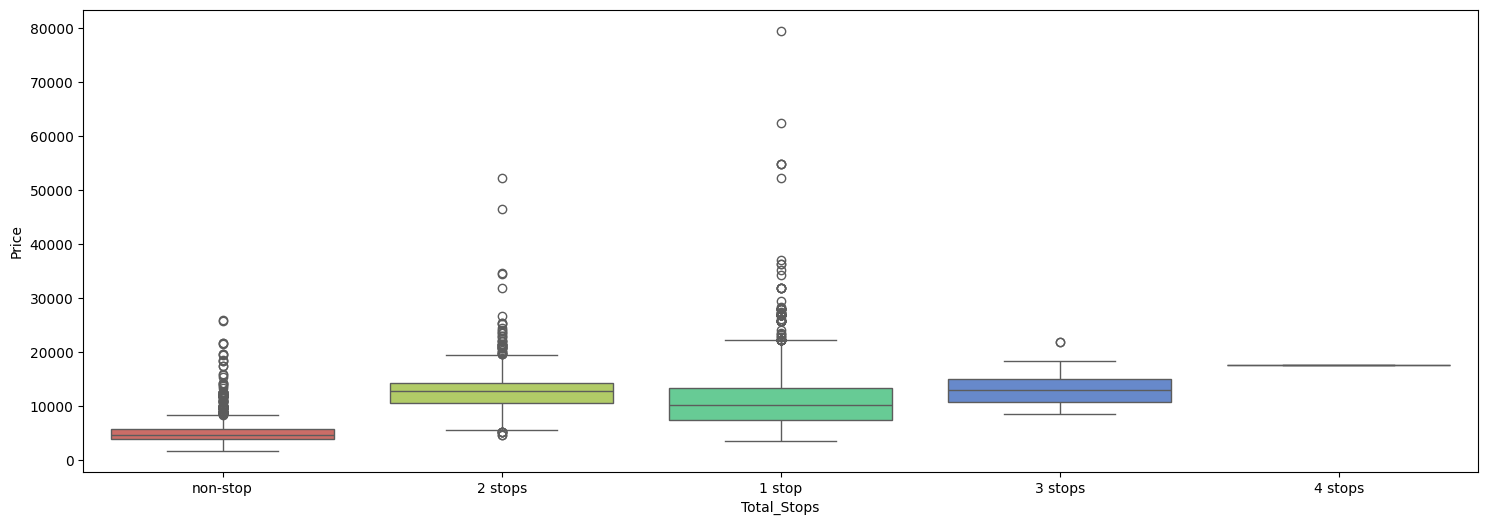

In [40]:
plt.figure(figsize= (18, 6))
sns.boxplot(data = df, y = "Price", x = "Total_Stops", palette= "hls")
#sns.boxplot(data = df, y = "Price", x = "Total_Stops", showfliers = False)
plt.show()

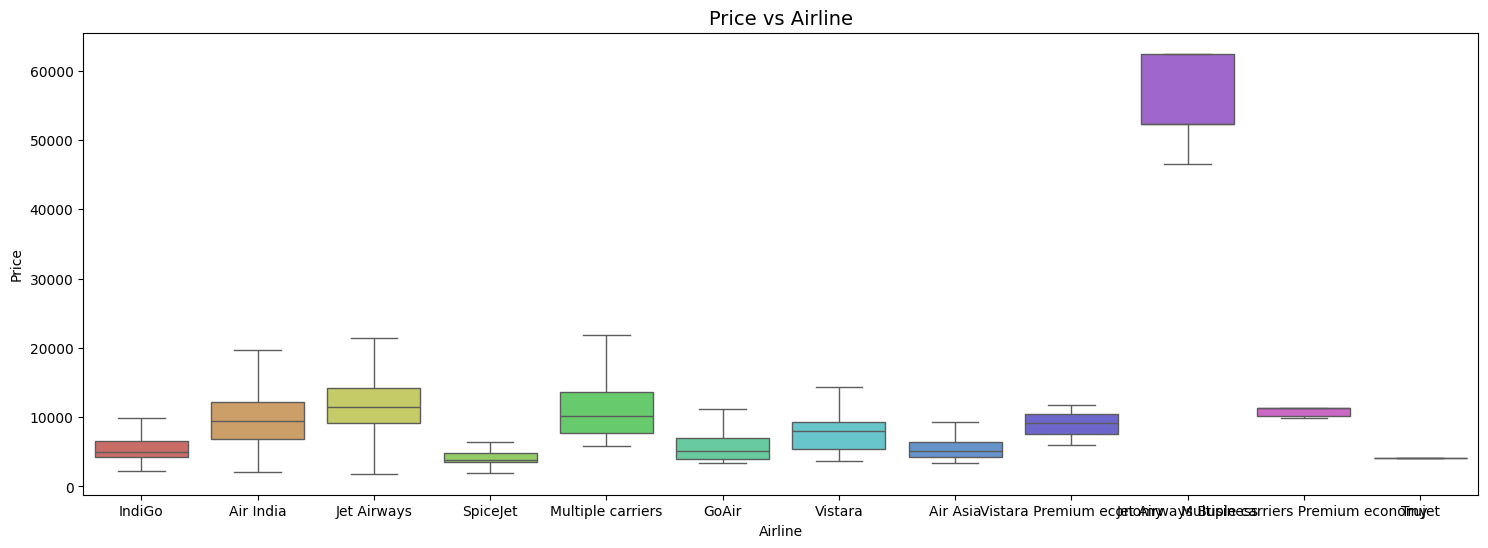

In [41]:
plt.figure(figsize=(18,6))
sns.boxplot(data = df, x = "Airline", y = "Price", palette= "hls", showfliers = False).set_title("Price vs Airline", fontsize = 14)
plt.show()

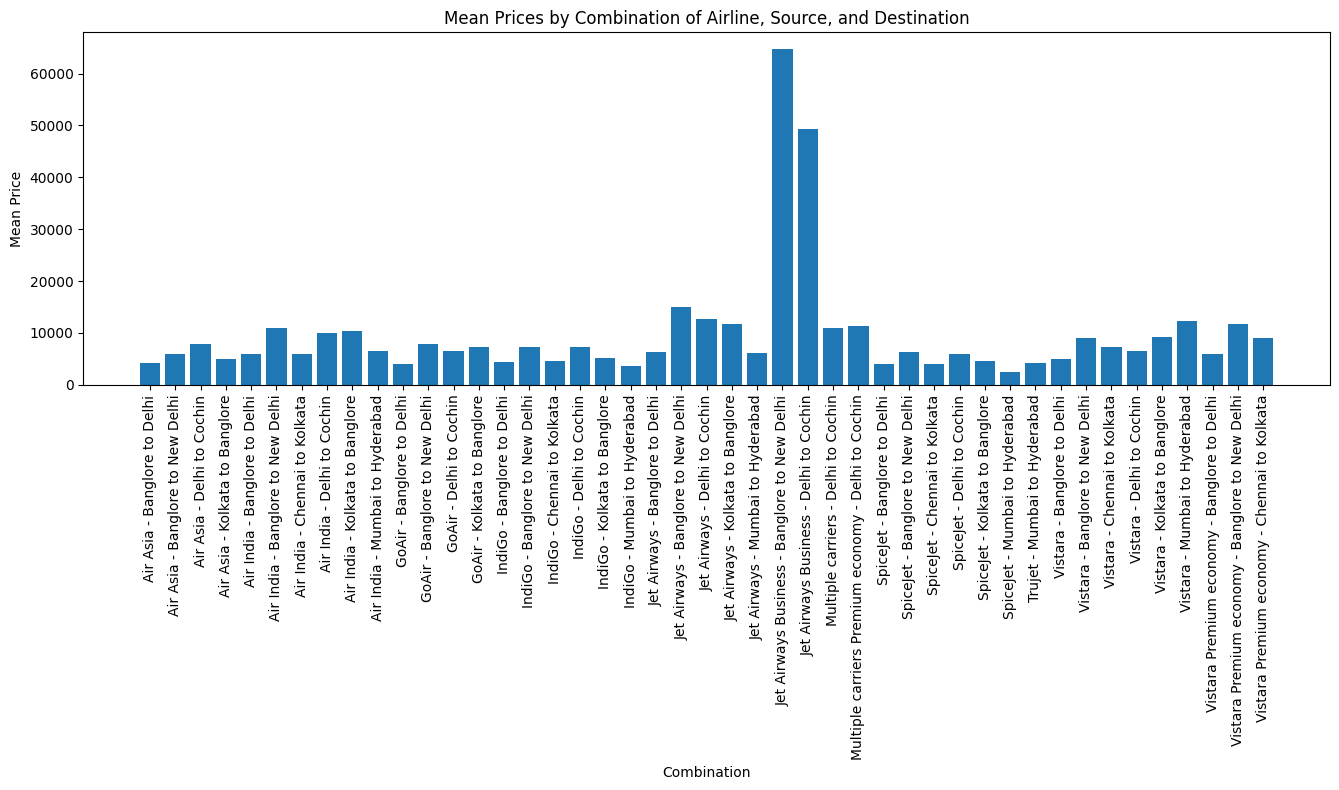

In [42]:
mean_prices = df.groupby(['Airline', 'Source', 'Destination'], as_index=False)['Price'].mean()

# Create a bar plot
plt.figure(figsize=(13.5, 8))  # Adjust the figure size as needed
plt.bar(mean_prices.index, mean_prices['Price'])
plt.xlabel('Combination')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Combination of Airline, Source, and Destination')
plt.xticks(mean_prices.index, [f'{row["Airline"]} - {row["Source"]} to {row["Destination"]}' for _, row in mean_prices.iterrows()], rotation=90)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Correlation Plot'}>

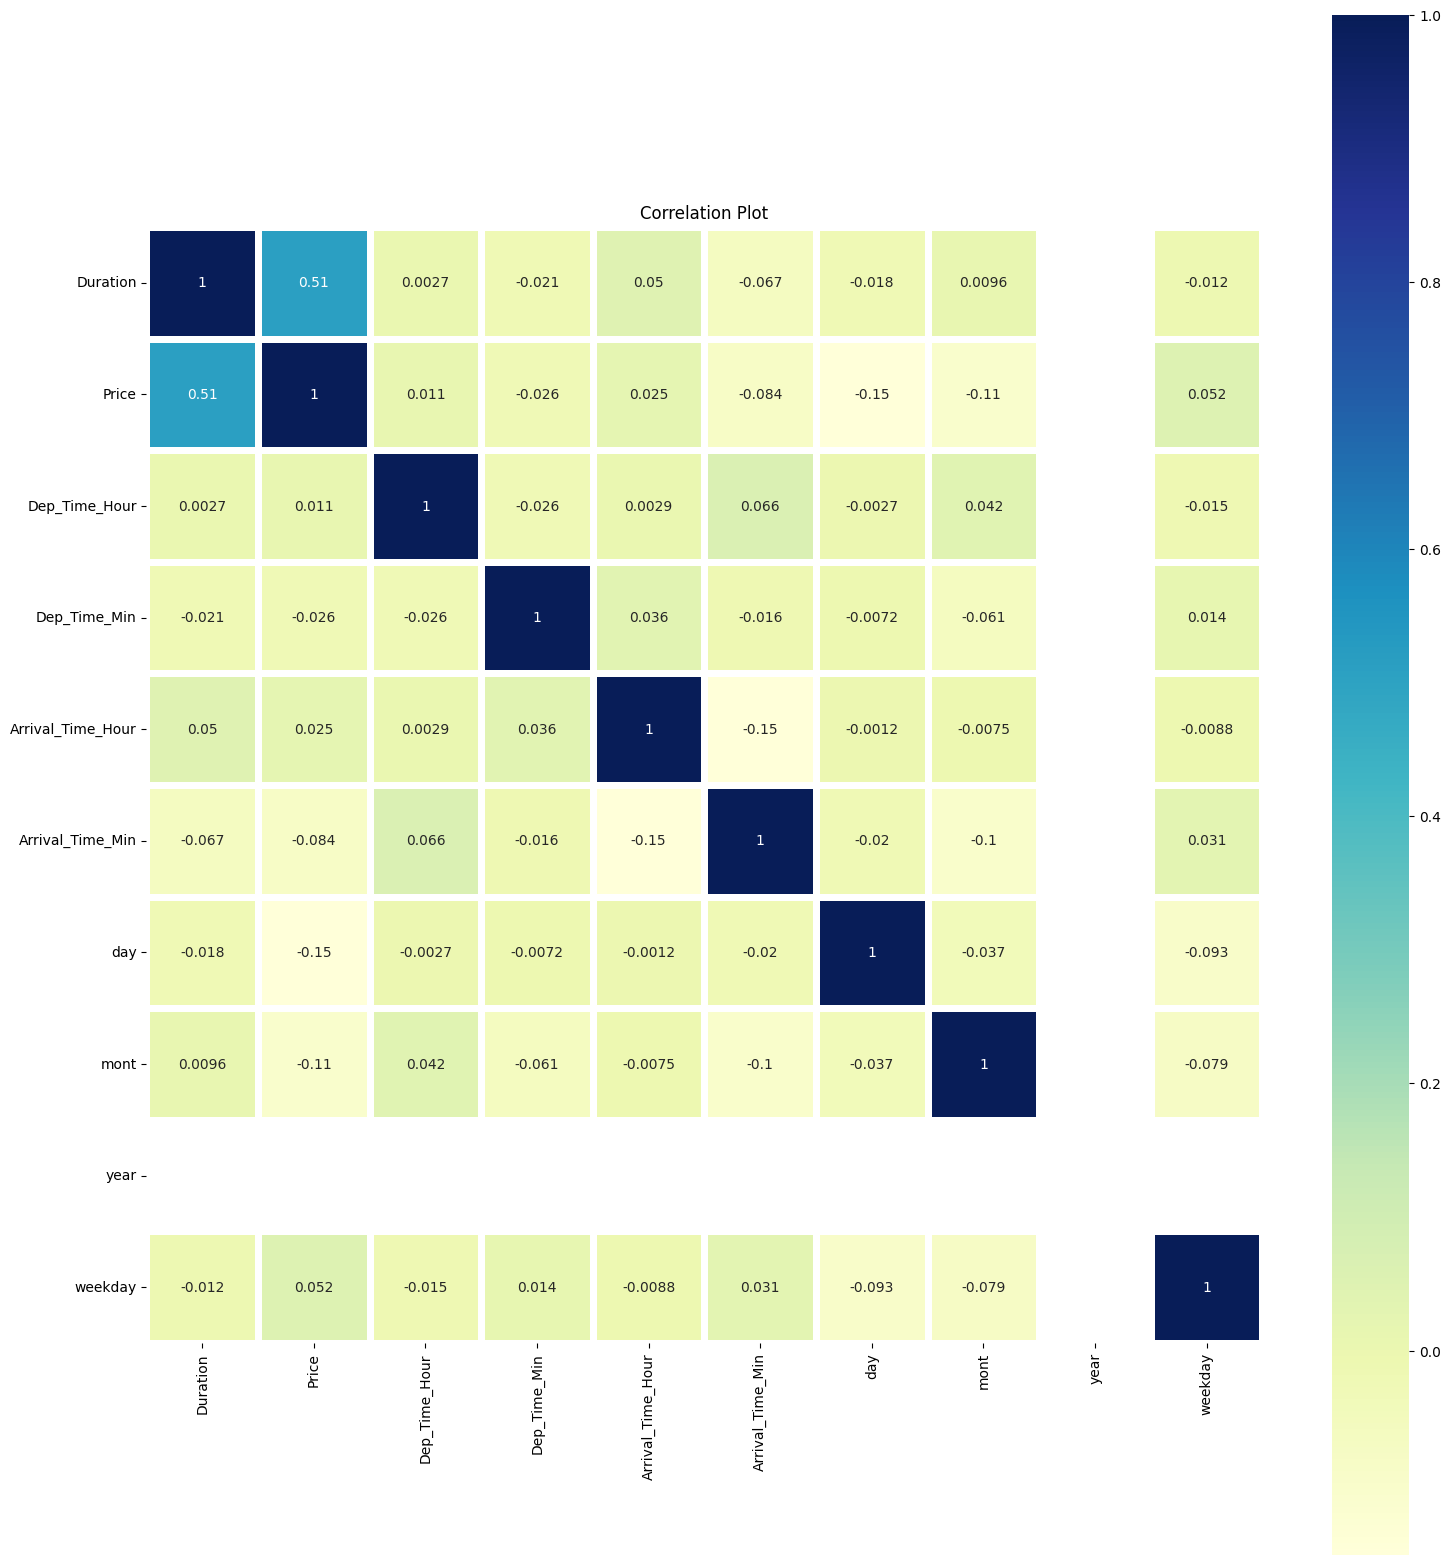

In [43]:
plt.figure(figsize=(18,20))
plt.title("Correlation Plot")
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
df_numerical = df[numerical_columns]
sns.heatmap(df_numerical.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

# Feature Engineering

In [44]:
dataset =  pd.read_excel("./a1_FlightFare_Dataset.xlsx")
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [45]:
dataset.dropna(inplace = True)

In [46]:
dataset["journey_day"] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
dataset["journey_month"] = pd.to_datetime(dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10000 non-null  object
 1   Date_of_Journey  10000 non-null  object
 2   Source           10000 non-null  object
 3   Destination      10000 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10000 non-null  object
 6   Arrival_Time     10000 non-null  object
 7   Duration         10000 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10000 non-null  object
 10  Price            10000 non-null  int64 
 11  journey_day      10000 non-null  int32 
 12  journey_month    10000 non-null  int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 1015.6+ KB


In [48]:
dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [49]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [50]:
# agregar variables de estacionales

dataset["dep_hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour

#Mintutos

dataset["dep_min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute


dataset.drop(["Dep_Time"], axis =  1, inplace = True)

In [51]:
dataset.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [52]:
dataset["arrival_hour"] = pd.to_datetime(dataset["Arrival_Time"]).dt.hour

dataset["arrival_min"] = pd.to_datetime(dataset["Arrival_Time"]).dt.minute

dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

In [53]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [54]:
# La duración es el tiempo que tarda el avión en llegar al destino.
# Es la diferencia entre la hora de llegada y la hora de salida.
# Asignar y convertir la columna Duración en una lista, para recorrerla en bucle
duration = list(dataset["Duration"])
# En la tabla anterior, Índice de fila = 2, tenemos Duración = 19 h (minutos faltantes)
# Recorriendo todos los valores de duración, para asegurar que tenga horas y minutos: 'xh ym'
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
# Prepare separate duration_hours and duration_mins lists
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

# Agregue la lista de duración_horas y duración_minutos a nuestro conjunto de datos df
dataset["Duration_hours"] = duration_hours
dataset["Duration_mins"] = duration_mins
# Drop Duration column from the dataset
dataset.drop(["Duration"], axis = 1, inplace = True)

dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Manejo de Datos Categoricos

1. Datos nominales  --> datos que no tiene ningún orden `OneHotEncoder`
2. Datos ordinales  --> Datos que tiene orden `LabelEncoder`


In [55]:
# Cantidad de aerolineas
dataset["Airline"].nunique()

12

In [56]:
dataset["Airline"].value_counts()

Airline
Jet Airways                          3598
IndiGo                               1927
Air India                            1633
Multiple carriers                    1129
SpiceJet                              769
Vistara                               447
Air Asia                              296
GoAir                                 179
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [57]:
Airline = dataset[["Airline"]]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
  if carrier in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('Other')

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()
                    

Airline
Jet Airways          3598
IndiGo               1927
Air India            1632
Multiple carriers    1129
SpiceJet              769
Vistara               447
Air Asia              296
GoAir                 179
Other                  22
Name: count, dtype: int64

In [58]:
dataset.select_dtypes(include = ["object"])

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
9996,Multiple carriers,Delhi,Cochin,DEL → IDR → BOM → COK,2 stops,No info
9997,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1 stop,In-flight meal not included
9998,Air India,Banglore,Delhi,BLR → DEL,non-stop,No info
9999,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info


In [59]:
Airline = pd.get_dummies(Airline, drop_first= True, dtype= int, prefix= "Airline")
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9996,0,0,0,1,0,0,0,0
9997,1,0,0,0,0,0,0,0
9998,0,0,1,0,0,0,0,0
9999,0,0,0,0,1,0,0,0


In [60]:
dataset["Source"].value_counts()

Source
Delhi       4257
Kolkata     2678
Banglore    2058
Mumbai       647
Chennai      360
Name: count, dtype: int64

In [61]:
Source =  dataset["Source"]

Source = pd.get_dummies(Source, drop_first= True, dtype= int, prefix= "Source")
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [62]:
dataset["Destination"].value_counts()

Destination
Cochin       4257
Banglore     2678
Delhi        1191
New Delhi     867
Hyderabad     647
Kolkata       360
Name: count, dtype: int64

In [63]:
Destination = dataset[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first = True, dtype = int)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [64]:
dataset.drop(["Route", "Additional_Info"], axis = 1, inplace= True)

In [65]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [66]:
dataset["Total_Stops"].value_counts()

Total_Stops
1 stop      5281
non-stop    3259
2 stops     1415
3 stops       44
4 stops        1
Name: count, dtype: int64

In [67]:
dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops":2, "3 stops": 3, "4 stops":4}, inplace = True)

In [68]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [71]:
data_train = pd.concat([dataset, Airline, Source, Destination], axis = 1) 

data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [72]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Featuree Selection

`Facto de inflación de la Varianza` VIF

- VIF = 1 No hay multicolinealidad

- VIF > 1 Hay presencia de Multicolinealidad

- VIF = 5 - 10 Hay multicolinealidad problematica

- VIF > 10 Multicolinealidad Muy Problematica

In [73]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [75]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]

y = data_train.iloc[:,1]

In [77]:
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [79]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [80]:
print(X.shape, y.shape)

(10000, 25) (10000,)


In [83]:
# Crear un modelo

from sklearn.ensemble import ExtraTreesRegressor

Selection = ExtraTreesRegressor()

Selection.fit(X, y)

print(Selection.feature_importances_)

[0.24490788 0.13923071 0.06606033 0.02954113 0.02392456 0.03291253
 0.02376448 0.13931337 0.02081279 0.00807513 0.00129765 0.01184852
 0.11438133 0.01808668 0.02597898 0.00395175 0.00320425 0.0012714
 0.02237498 0.010001   0.01498921 0.00696544 0.03146794 0.00383664
 0.00180131]


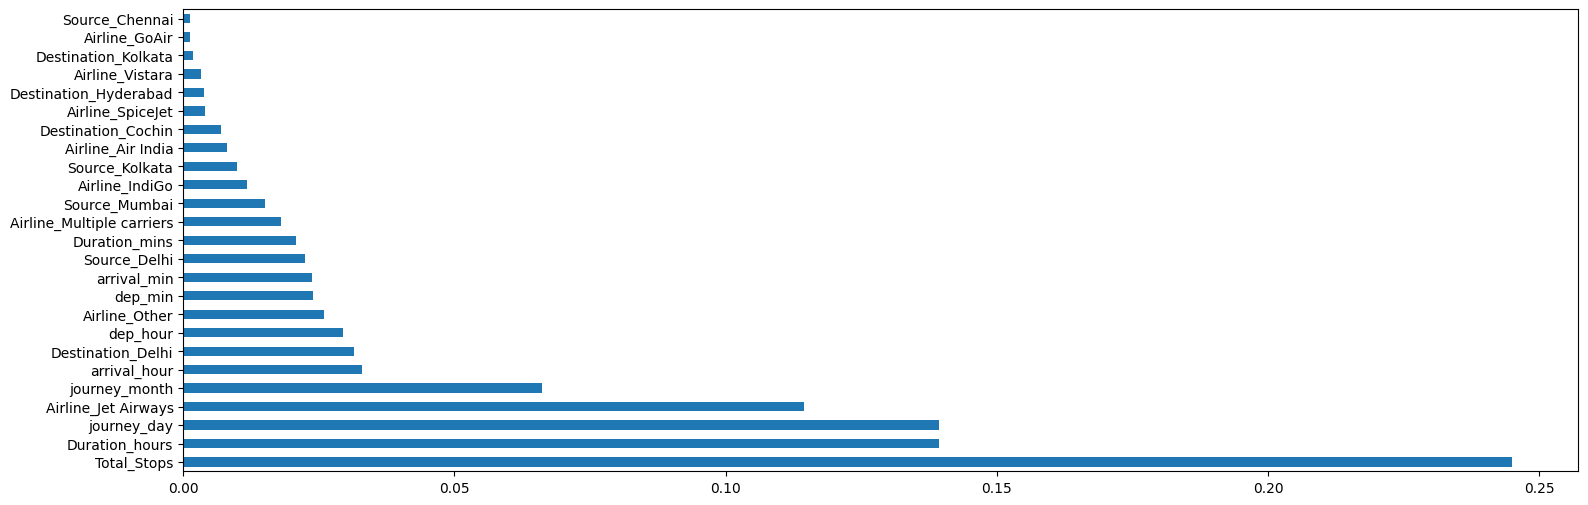

In [85]:
plt.figure(figsize= (18,6))
feat_importances = pd.Series(Selection.feature_importances_, index = X.columns)
feat_importances.nlargest(25).plot(kind = "barh")
plt.show()

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(z):
    vif = pd.DataFrame()

    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [88]:
cal_vif(X)

,variables,VIF
0,Total_Stops,7.533035
1,journey_day,3.511805
2,journey_month,16.470796
3,dep_hour,5.790951
4,dep_min,2.804206
5,arrival_hour,4.923106
6,arrival_min,3.455823
7,Duration_hours,6.183394
8,Duration_mins,4.106901
9,Airline_Air India,5.381726


In [89]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]

y = data_train.iloc[:,1]

In [90]:
cal_vif(X)

,variables,VIF
0,Total_Stops,7.066192
1,journey_day,3.460860
2,journey_month,15.002639
3,dep_hour,5.762068
4,dep_min,2.803870
5,arrival_hour,4.901456
6,arrival_min,3.454707
7,Duration_hours,6.178091
8,Duration_mins,4.106244
9,Airline_Air India,5.294051


# Entrenar un modelo de `Random Forest`

- Dividimos los datos en entrenamiento y en Prueba
- Entrenar un modelo 
- Evaluar el modelo
- Revisar las metricas

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 24), (2000, 24), (8000,), (2000,))

# Crear el modelo

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rf_reg =  RandomForestRegressor()

# entrenamos el modelo

rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [103]:
print("Datos de Entrenamiento", rf_reg.score(X_train, y_train)*100)
print("Datos de Prueba", rf_reg.score( X_test, y_test)*100)

Datos de Entrenamiento 95.40512990563987
Datos de Prueba 82.36374779589552


- # Realizar predicciones

In [104]:
y_pred_rf = rf_reg.predict(X_test)
y_pred_rf

array([ 9087.27      , 11675.22333333, 12798.59233333, ...,
        8816.95      , 11145.06      ,  4339.55      ])

<function matplotlib.pyplot.show(close=None, block=None)>

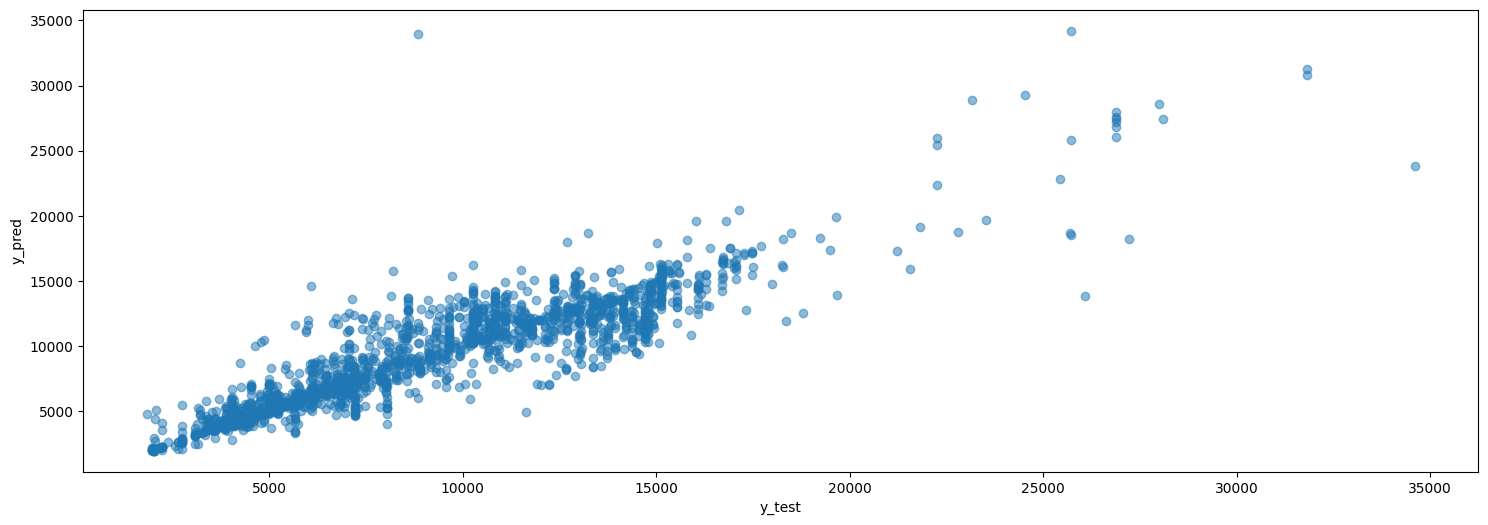

In [105]:
plt.figure(figsize= (18,6))
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show

- # Estimar las metricas

In [113]:
from sklearn import metrics
import numpy as np

In [125]:
print("R2:", round(metrics.r2_score(y_test, y_pred_rf) , 2))
print("MAE:", round(metrics.mean_absolute_error(y_test, y_pred_rf), 2) )
print("MSE:", round(metrics.mean_squared_error(y_test, y_pred_rf), 2) )
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)) )

R2: 0.82
MAE: 1178.74
MSE: 3503609.93
RMSE: 1871.7932383234977


- # Guardar el Modelo



In [116]:
import pickle

path = "c2_flight_rf.pkl"

file = open(path, "wb")

pickle.dump(rf_reg, file)

- Abrir el modelo

In [117]:
path = "c2_flight_rf.pkl"

model = open(path, "rb")

rf_model = pickle.load(model)

In [118]:
unseen_dataset = pd.read_excel("./a2_Unseen_Dataset.xlsx")
unseen_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149


In [119]:
# Perform feature engineering on object dt variables
# Feature Engineering on: 'Date_of_Journey'
unseen_dataset["journey_day"] = pd.to_datetime(unseen_dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
unseen_dataset["journey_month"] = pd.to_datetime(unseen_dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
unseen_dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Feature Engineering on: 'Dep_Time'
unseen_dataset["dep_hour"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.hour
unseen_dataset["dep_min"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.minute
unseen_dataset.drop(["Dep_Time"], axis = 1, inplace = True)

# Feature Engineering on: 'Arrival_Time'
unseen_dataset["arrival_hour"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.hour
unseen_dataset["arrival_min"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.minute
unseen_dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

# Feature Engineering on: 'Duration'
duration = list(unseen_dataset["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
unseen_dataset["Duration_hours"] = duration_hours
unseen_dataset["Duration_mins"] = duration_mins
unseen_dataset.drop(["Duration"], axis = 1, inplace = True)


# Perform feature engineering on Categorical dt variables
# Feature Engineering on: 'Airline'
Airline = unseen_dataset[["Airline"]]
New_Airline_List = []
Current_Airline_List = Airline['Airline']
for carrier in Current_Airline_List:
  if carrier in ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('Other')
Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline = pd.get_dummies(Airline, drop_first= True, dtype = int)

# Feature Engineering on: 'Source'
Source = unseen_dataset[["Source"]]
Source = pd.get_dummies(Source, drop_first= True, dtype = int)
Source.head()

# Feature Engineering on: 'Destination'
Destination = unseen_dataset[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []
for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)
Destination['Destination'] = pd.DataFrame(New_Destination_List)
Destination['Destination'].value_counts()
Destination = pd.get_dummies(Destination, drop_first = True, dtype =  int)
Destination.head()

# Feature Engineering on: 'Route', 'Additional_Info
unseen_dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Feature Engineering on: 'Total_Stops'
unseen_dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> train_data + Airline + Source + Destination
data_test = pd.concat([unseen_dataset, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

# See how the test dataset looks
data_test.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,12898,27,5,7,5,19,0,11,55,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,1,10851,6,3,2,5,7,25,5,20,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,5704,21,3,9,45,23,0,13,15,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,11598,18,3,21,10,0,5,2,55,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,9149,27,5,8,30,19,15,10,45,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [120]:
# Drop 'Source_Delhi'
X_unseen = data_test.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y_unseen = data_test.iloc[:, 1]

In [123]:
y_unseen

0      12898
1      10851
2       5704
3      11598
4       9149
       ...  
677     4107
678     4145
679     7229
680    12648
681    11753
Name: Price, Length: 682, dtype: int64

In [121]:
y_pred_un = rf_model.predict(X_unseen)
y_pred_un

array([15386.9415    , 11186.19      ,  6494.56      ,  5640.93583333,
        9265.2767381 ,  4154.96      ,  6065.86      ,  8073.48      ,
        6623.77      ,  5417.42816667, 11982.        ,  4230.72      ,
        8297.39      ,  4207.29      ,  3595.22      ,  7616.1       ,
        9840.185     , 11913.64566667, 12225.25442857, 10305.04      ,
        7440.39142857, 11993.768     ,  3712.71866667, 12949.21      ,
       10514.51      , 13007.7615    ,  6645.73333333, 14104.05166667,
       10684.926     ,  7551.91      ,  4646.02      , 10109.57166667,
       12094.02666667, 10348.34      ,  4106.54      , 10987.452     ,
       11293.34083333,  6348.58      ,  4633.07      , 15242.43314286,
        9415.64      ,  3871.32      ,  8447.97      ,  5584.48      ,
        6945.4       , 12542.111     ,  4806.38      ,  6173.31      ,
        5434.24      , 12583.43      ,  9196.95      ,  6574.56      ,
        7707.575     , 13499.19333333, 17757.93516667, 11106.23566667,
      

In [124]:
print("R2:", round(metrics.r2_score(y_unseen, y_pred_un) , 2))
print("MAE:", round(metrics.mean_absolute_error(y_unseen, y_pred_un), 2) )
print("MSE:", round(metrics.mean_squared_error(y_unseen, y_pred_un), 2) )
print("MSE:", np.sqrt(metrics.mean_squared_error(y_unseen, y_pred_un)) )

R2: 0.65
MAE: 1304.17
MSE: 8345407.92
MSE: 2888.8419682312647
